In [1]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [2]:
sigma = 15  # Стандартное отклонение
Z = 1.96  #  %   # Квантиль нормального распределения. 
Delta = 3 #%         #Погрешность

In [4]:
N = int(((sigma*Z)/Delta)**2)
print('минимально необходимый объем выборки: ', N)

минимально необходимый объем выборки:  96


<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [6]:
import scipy.stats as stats

population_men = stats.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165



stats.ttest_ind(a=population_men, b=population_women, equal_var=False)

Ttest_indResult(statistic=1.5941446677549458, pvalue=0.11092991376471907)

pvalue больше уровня значимости, а это значит, что мы не можем отклонить нулевую гипотезу.

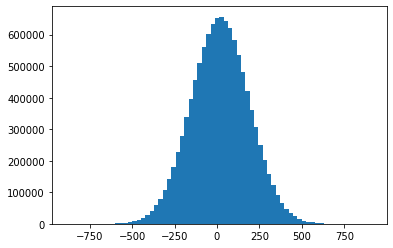

In [39]:
plt.hist(population_men, bins=70);
plt.hist(population_women, bins=70);

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [13]:
sigma = 150
Z = 1.96  # 97,5%
e = 50 #%

N = int(((sigma*Z)/e)**2)
N

34

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [18]:

observations = pd.DataFrame([[25,36],[15,44]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,25,36
Солнце,15,44


In [19]:

import scipy as sp 

oddsratio, pvalue = sp.stats.fisher_exact(observations)
print('pvalue =', pvalue)

pvalue = 0.08323639416753109


В нашем случае я не могу отклонить нулевую гипотезу.\
Нельзя исключить, что маг действительно может предсказывать погоду

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [20]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [23]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), sp.stats.sem(data)
    h = se * sp.stats.t.ppf((1 + confidence)/2, n)
    return m-h,m, m+h




print(mean_confidence_interval(data, 0.90))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


In [25]:
# ДИ для 95%

x = np.mean(data)
se = sp.stats.sem(data)

print(x-2*se, x+2*se)

5.972196283298139 7.284946573844719


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [27]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

# ДИ первой выборки с уровнем доверия 95%

x = np.mean(data_1)
se = sp.stats.sem(data_1)
print(x-2*se, x+2*se)

5.972196283298139 7.284946573844719


In [28]:
# среднее второй выборки

x = np.mean(data_2)
print(x)

3.967741935483871


Среднее второй выборки не входит в множество первой выборки, поэтому эти выборки не принадлежат одному множеству.\
Тесты:

In [29]:

# Тест Стьюдента, pvalue явно ниже 0,05, что позволяет отвергнуть нулевую гипотезу.

t , p  = stats.ttest_ind(data_1, data_2)
print("t = " + str(t))
print("p = " + str(p))

t = 7.35744682757447
p = 2.1159475572725764e-11


In [30]:

# Тест Стьюдента, pvalue явно ниже 0,05, что позволяет отвергнуть нулевую гипотезу.

t , p  = stats.ttest_ind(data_1, data_2)
print("t = " + str(t))
print("p = " + str(p))

t = 7.35744682757447
p = 2.1159475572725764e-11


<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

Все рассмотренные нами тесты были предназначены для сравнения двух и более выборок (зависимых или независимых) и нулевая гипотеза по умолчанию - равенство средних двух выборок, принадлежность их к одному множеству. Для проверки на нормальность применяют например тест Шапиро-Уилка, где за нулевую гипотезу принимается "Анализируемая выборка происходит из генеральной совокупности, имеющей нормальное распределение". Если получаемая при помощи того или иного теста вероятность ошибки p оказывается меньше некоторого заранее принятого уровня значимости (например, 0.05), нулевая гипотеза отклоняется. Поэтому я вправе отклонить нулевую гипотезу, что распределение нормальное.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [31]:
np.random.seed(11)
A = stats.norm.rvs(scale=15,loc=169,size=300)
B = stats.norm.rvs(scale=14,loc=171.4,size=300)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f551e1d50>]],
      dtype=object)

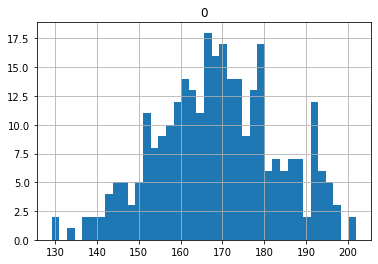

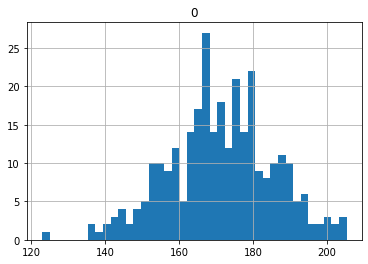

In [32]:
pd.DataFrame(A).hist(bins=40)
pd.DataFrame(B).hist(bins=40)

In [40]:
stats.ttest_ind(a=A,b=B,equal_var=False)

Ttest_indResult(statistic=-1.95300880485141, pvalue=0.051284961272800134)